In [1]:
#module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import math

In [94]:
#data processing
dataframe = pd.read_csv('italy.csv',header=None)
data = dataframe.iloc[:,[0,2]].values
data = data[data[:,1]>0]
x = data[:,0]
y = np.log2(data[:,1])

dataframe2 = pd.read_csv('us_ny.csv',header=None)
data2 = dataframe2.iloc[:,[0,2]].values
data2 = data2[data2[:,1]>0]
x2 = data2[:,0]
y2 = np.log2(data2[:,1])

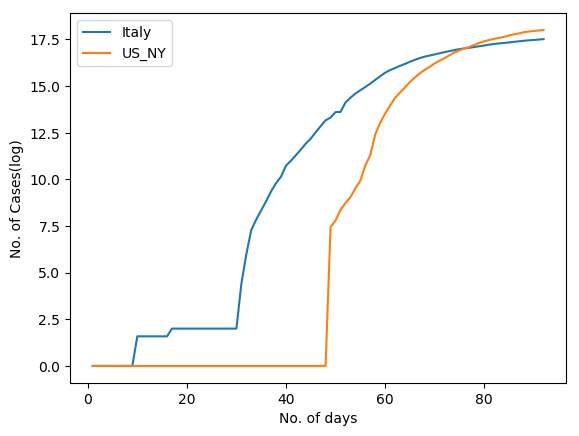

In [95]:
#original data plot
plt.plot(x,y,label='Italy')
plt.plot(x2,y2,label='US_NY')
plt.xlabel('No. of days')
plt.ylabel('No. of Cases(log)')
plt.style.use('default')
plt.legend()
plt.show()

In [96]:
#do not touch this function
def kernel_matrix_generator(x,w_1,w_2,w_3):
    kernel_matrix = np.zeros(shape=(x.shape[0],x.shape[0]))
    i=0
    for x_i in x:
        j=0
        for x_j in x:
            kernel_matrix[i,j] = kernel_formula(x_i,x_j,w_1,w_2,w_3)
            j+=1
        i+=1
    return kernel_matrix

#do not touch this function
def solver(x,y,gamma,w_1,w_2,w_3):
    kernel_matrix = kernel_matrix_generator(x,w_1,w_2,w_3)
    A = gamma*(kernel_matrix.shape[0])*np.identity(kernel_matrix.shape[0])
    A = np.add(A,kernel_matrix)
    B=y
    c = np.linalg.solve(A,B)
    return c

#do not touch this function
def predictor(x_train,x_test,y_train,gamma,w_1,w_2,w_3):
    c = solver(x_train,y_train,gamma,w_1,w_2,w_3)
    output = np.zeros(shape=(x_test.shape[0]))
    for j in range(x_test.shape[0]):
        for i in range(x_train.shape[0]):
            output[j]+=c[i]*kernel_formula(x_train[i],x_test[j],w_1,w_2,w_3)
    return output

def kernel_formula(x_i,x_j,w_1,w_2,w_3):
    return np.power(x_i*x_j,w_1)+w_2*np.exp(-w_3*np.square(x_i-x_j))

def MSE(yT,yP):
    N=len(yT)
    if len(yT)!=len(yP):
        print (len(yT))
        return 1
    s=0
    for i in range(0,N):
       s+=(yT[i]-yP[i])**2
    return math.sqrt(s)

w1= 0.7350 | w2= 16.1000 | w3= 0.0040 | gam= 0.0010 | MSE= 3.2718 | MSE2= 6.5026


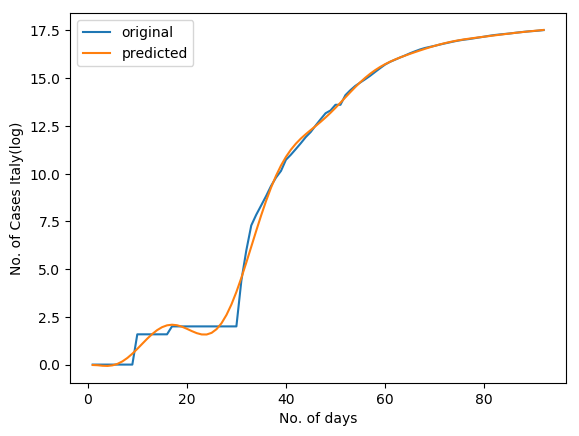

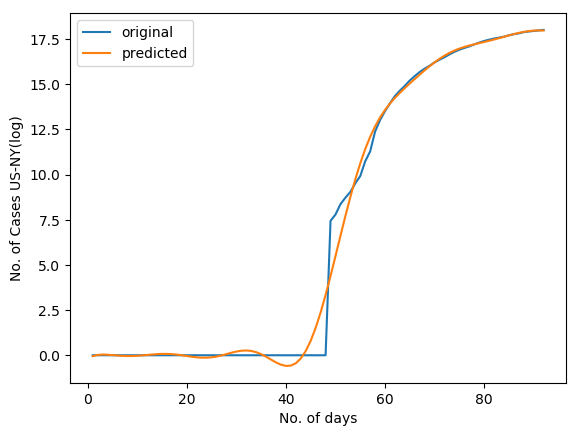

In [97]:
least= float('inf')
least2= float('inf') 
#w1=  0.7350 w2=  16.1000 w3=  0.0040 gam=  0.0010 mse:  3.3100 mse2:  0.7206

for i in np.arange(0.735,0.736,0.01):  #range of w_1
    for j in np.arange (16.1,16.2,1):   #range of w_2
        for k in np.arange(0.004,0.0041,0.001):  #range of w_3
            for l in np.arange(0.001,0.002,0.01):  #range of gamma
               currpreds=predictor(x,x,y,l,i,j,k)
               curr=MSE(currpreds,y) #train italy
               currpreds2=predictor(x2,x2,y2,l,i,j,k)
               curr2=MSE(currpreds2,y2) #test NY
               if curr+curr2<least+least2:
                    preds=currpreds
                    preds2=currpreds2
                    least=curr
                    least2=curr2
                    w_1=i
                    w_2=j
                    w_3=k
                    gam=l
                    print("w1= %5.4f | w2= %5.4f | w3= %5.4f | gam= %5.4f | MSE= %5.4f | MSE2= %5.4f" %(w_1,w_2,w_3,gam,least,least2))    

plt.plot(x,y,label='original')
plt.plot(x,preds,label='predicted')
plt.legend()
plt.xlabel('No. of days')
plt.ylabel('No. of Cases Italy(log)')
plt.style.use('default')
plt.show()

plt.plot(x,y2,label='original')
plt.plot(x,preds2,label='predicted')
plt.legend()
plt.xlabel('No. of days')
plt.ylabel('No. of Cases US-NY(log)')
plt.style.use('default')
plt.show()



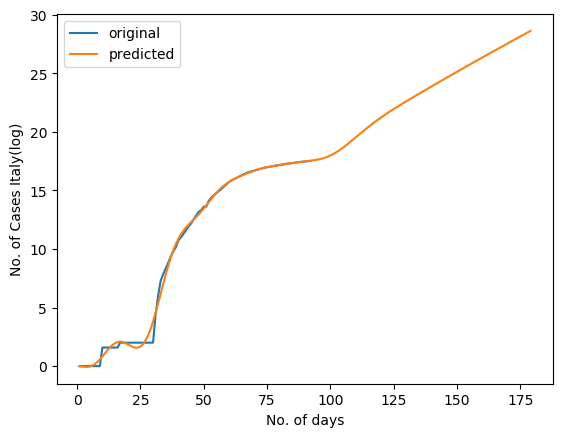

In [102]:
x_test = np.arange(1,180)
preds=predictor(x,x_test,y,0.001,0.7350,16.1,0.004)
plt.plot(x,y,label='original')
plt.plot(x_test,preds,label='predicted')
plt.legend()
plt.xlabel('No. of days')
plt.ylabel('No. of Cases Italy(log)')
plt.style.use('default')
plt.show()

In [47]:
#starting data
arr = list()
y = np.ones(20)
w1 = 3
w2 = 4
w3 = 5
gam = 6
xday = 7

In [48]:
temp = np.zeros(5)
temp[0] = w1
temp[1] = w2
temp[2] = w3
temp[3] = gam
temp[4] = xday
y = np.append(y,temp)
arr.append(y)

In [49]:
arr

[array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 3., 4., 5., 6., 7.])]

In [46]:
arr

3

NameError: name 'size' is not defined